In [380]:
import torch
from numpy import mean
import matplotlib.pyplot as plt
plt.style.use('default')

In [381]:
def get_file(mode, a, temperature, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure):
    if mode == 'fedavg':
        save_path = f'./res/fedavg_seed_{seed}_' + \
            f'alpha_{alpha}_' + \
            f'dataset_{dataset}_' + \
            f'model_structure_{model_structure}/'
        file_name = save_path + \
            f'local_epochs_{local_epochs}_' + \
            f'server_epochs_{server_epochs}_' + \
            f'batch_size_{batch_size}.pt'
    elif mode == 'hyper_fed':
        save_path = f'./res/hyper_fed_seed_{seed}_' + \
            f'alpha_{alpha}_' + \
            f'dataset_{dataset}_' + \
            f'model_structure_{model_structure}/'
        file_name = save_path + \
            f'a_{a}_' + \
            f'T_{temperature}_' + \
            f'local_epochs_{local_epochs}_' + \
            f'server_epochs_{server_epochs}_' + \
            f'distill_epochs_{distill_epochs}_' + \
            f'batch_size_{batch_size}.pt'
    elif mode == 'mllsgd':
        save_path = f'./res/mllsgd_seed_{seed}_' + \
            f'alpha_{alpha}_' + \
            f'dataset_{dataset}_' + \
            f'model_structure_{model_structure}/'
        file_name = save_path + \
            f'local_epochs_{local_epochs}_' + \
            f'server_epochs_{server_epochs}_' + \
            f'batch_size_{batch_size}.pt'
    elif mode == 'normal':
        save_path = f'./res/normal_seed_{seed}_' + \
            f'alpha_{alpha}_' + \
            f'dataset_{dataset}_' + \
            f'model_structure_{model_structure}/'
        file_name = save_path + \
            f'local_epochs_{local_epochs * server_epochs}_' + \
            f'batch_size_{batch_size}.pt'
    return file_name

In [382]:
a = 0.5
temperature = 0.5
n_client = 9
n_public_data=1000
seed=10000
local_epochs = 10
distill_epochs = 10
server_epochs = 60
batch_size = 160
alpha = 1.0
dataset = 'cifar10'
model_structure = 'resnet18'

mode_ = 2

In [383]:
modes = ['hyper_fed', 'fedavg', 'mllsgd', 'normal']
mode = modes[mode_]
file_name = get_file(mode, a, temperature, seed, local_epochs, distill_epochs, server_epochs, batch_size, alpha, dataset, model_structure)
# file_name = './res/normal_seed_10000_alpha_1.0_dataset_cifar10_model_structure_resnet18/local_epochs_600_batch_size_160.pt'
data_load = torch.load(file_name, map_location='cpu')
key = list(data_load.keys())
print(key)

['acc', 'acc_server']


0.6561360955238342
0.647225558757782
0.6484406590461731
0.6683194041252136
0.6751043796539307
0.6651878952980042
0.5855636596679688
0.5782643556594849
0.5688023567199707
acc_mean: 0.5923358495423455, acc_max: 0.6565646595425076


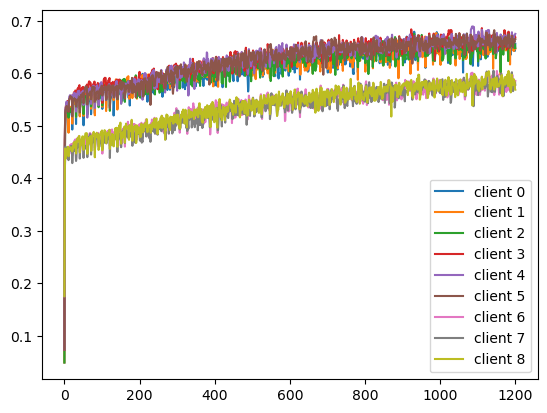

In [384]:
# FedAvg
if 'acc' in key:
    acc_all = []
    acc_max_all = []
    for i, acc in data_load['acc'].items():
        acc_all.append(acc)
        acc_max_all.append(max(acc))
        print(acc[-1])
        plt.plot(acc, label=f'client {i}')
    print(f'acc_mean: {mean(acc_all)}, acc_max: {mean(acc_max_all)}')
    plt.legend()
    plt.show()

0.5328466892242432
0.5328466892242432
0.5328466892242432


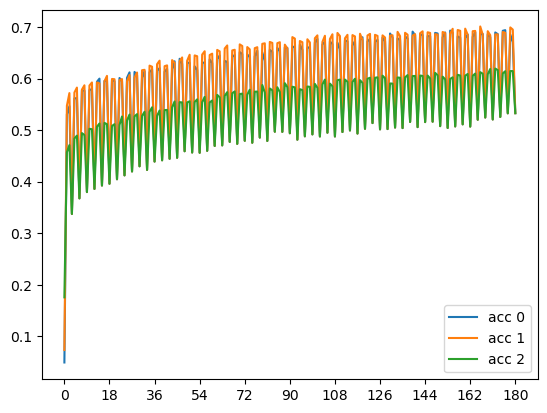

In [385]:
if 'acc_server' in key:
    acc__ = []
    for i, acc in data_load['acc_server'].items():
        # for j, acc_ in acc.items():
        plt.plot(acc, label=f'acc {i}')
        print(acc[-1])
    plt.xticks(ticks=range(0, len(acc), len(acc) // 10))
    plt.legend()
    plt.show()